Dense network, Cross Entropy Function, ReLu activation,  with 1 hidden layer.
Start from here to improve the model in later iterations
3 layers:
- first hiden layer : 64 units, ReLu
- second hiden layer : 64 units, ReLu
- Output: 10 units, softmax

Accuracy: above 94%

Import packages

In [52]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

In [53]:
#TF
print(np.random.uniform())

0.5162648549734126


Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [54]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


In [55]:
print(x_train.shape)


(60000, 28, 28)


In [56]:
print(y_train.shape)

(60000,)


In [57]:
print(x_train[0].shape)

(28, 28)


In [58]:
print(y_train)
print(y_train.size)

[5 0 4 ... 5 6 8]
60000


In [59]:
print(x_valid.shape)
print(y_valid.shape)

(10000, 28, 28)
(10000,)


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [60]:
#print(x_train[0])

In [61]:
#x_train.reshape(60000, 784).astype('float32')

In [62]:
#use numpy reshape
x_train = np.reshape(x_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(x_valid, (10000, 28 * 28)).astype('float32')

In [63]:
print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [64]:
#print(x_train)
x_train /=  255
x_valid /=  255

In [65]:
#print(x_train[0])

Prepare labels (y_train and y_valid)
y_train[i] is given as a number (0, 9). We have 10 possible values. 
Convert to one-hot format:
0 => [1, 0, 0, 0, 0,0, 0,0, 0,0]
1 => [0, 1, 0, 0, 0,0, 0,0, 0,0]
9 => [0, 0, 0, 0, 0,0, 0,0, 0,1]

In [66]:
n_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, n_classes)
print(y_train[0])

print(y_valid[0])
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_valid[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [67]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [79]:
#Define activations
activation = keras.activations.relu
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
tf.print(sgd.lr)

0.1


In [80]:
#define First layer
inputSize = 28 * 28 # size of input vector
nbUnits = 64 #Number of input layer units (artificial neuron)
firstLayer = Dense(nbUnits, activation=  activation, input_shape=(inputSize,))
model.add(firstLayer)

secondlayer = Dense(nbUnits, activation=  activation)
model.add(secondlayer)

In [81]:
#define Output layer
 
outputUnits = 10 #Number of output layer units (artificial neuron)
# output shape will be inferred
outputLayer = Dense(outputUnits, activation=  softmax)
model.add(outputLayer)

In [82]:
#compile Model
model.compile(loss=loss, 
         optimizer=sgd,
         metrics=['accuracy'])

In [72]:
# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


TensorBoard

In [83]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
if not os.path.exists('logs/crossEntropyReLu2Layers'):
   os.mkdir('logs/crossEntropyReLu2Layers')
log_dir = "logs/crossEntropyReLu2Layers/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/crossEntropyReLu2Layers/20200229-142337


In [84]:
# Train
batch_size = 128
nb_epoch = 20
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5571 - accuracy: 0.9026 - val_loss: 0.2285 - val_accuracy: 0.9394
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1791 - accuracy: 0.9535 - val_loss: 0.1624 - val_accuracy: 0.9564
Epoch 3/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1393 - accuracy: 0.9621 - val_loss: 0.1338 - val_accuracy: 0.9634
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1164 - accuracy: 0.9687 - val_loss: 0.3760 - val_accuracy: 0.9010
Epoch 5/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1014 - accuracy: 0.9730 - val_loss: 0.1251 - val_accuracy: 0.9663
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0893 - accuracy: 0.9761 - val_loss: 0.8294 - val_accuracy: 0.8198
Epoch 7/20
60000/60000 [==============================] 

Plot History

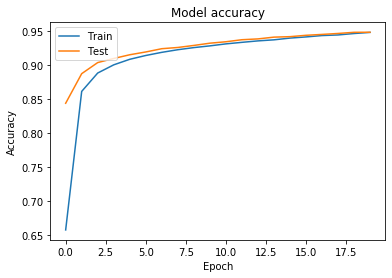

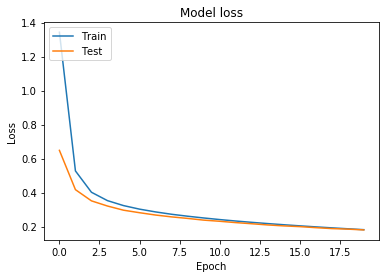

In [75]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [76]:
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


End